In [184]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
# 对数据进行标准化
pca = PCA(n_components=3)  # n_components为整数：降为指定维数；n_components为小数：保留新%x的原始信息。
# 进行降维
a =  pd.read_excel(r'xh.xlsx')
data = np.array(a)
x,y = data[:,:1050],data[:,1050]
x = (x - x.mean())/np.std(x)
y = (y - y.mean())/np.std(y)
print(x.shape,y.shape)
X = pd.DataFrame(x)
Y = pd.DataFrame(y)
#使用pca降维，保留三位有效数值
new_DF = pd.DataFrame(pca.fit_transform(X))

(530, 1050) (530,)


In [185]:
#划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(new_DF , Y , test_size=0.2 , random_state=0)

In [186]:
X_train.head()

,0,1,2
446,19.211936,0.032365,0.037124
473,22.069877,-0.013218,0.015619
502,25.139570,0.006904,0.010820
526,27.680004,0.044191,0.015415
412,15.612992,-0.024251,-0.027615


In [187]:
#PCR 
# 对数据进行标准化
# 使用返回后的数据用线性回归模型进行建模
import statsmodels.api as sm
#将得到的PCA降维后的数据用最小二乘法建模在进行数据拟合
ols = sm.OLS(Y_train, X_train).fit()
#将数据总结
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      0   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              3665.
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                   3.33e-301
Time:                        18:43:59   Log-Likelihood:                          101.88
No. Observations:                 424   AIC:                                     -197.8
Df Residuals:                     421   BIC:                                     -185.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0059      0.001     10.439      0.000       0.005       0.007
1             -0.1727      0.121     -1.422      0.156      -0.411       0.066
2             28.0488      0.269    104.162      0.000      27.519      28.578
==============================================================================
Omnibus:                       37.386   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.567
Skew:                          -0.595   Prob(JB):                     1.92e-13
Kurtosis:                       4.377   Cond. No.                         474.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
# 使用LinearRegression进行拟合，其实这两种拟合的都差不多
from sklearn.linear_model import LinearRegression
#通过线性回归算出关于已经进行过PCA分析的回归直线
lr = LinearRegression()
lr.fit(X_train,Y_train)   # 模型训练
a = lr.score(X_train, Y_train) # 获取模型的得分
print(a)

0.9631185057266993


In [189]:
y_pred = lr.predict(X_test)

In [190]:
y_pred.shape

(106, 1)

In [191]:
Y_test.shape

(106, 1)

In [192]:
from sklearn.linear_model import LinearRegression
#通过线性回归算出关于已经进行过PCA分析的回归直线
lr = LinearRegression()
#用线性回归得出的y_pred和Y_test进行线性回归
lr.fit(y_pred,Y_test)   # 模型训练
c = lr.score(y_pred, Y_test) # 获取模型的得分
print(c)
#得出的斜率和截距
k = lr.coef_
b = lr.intercept_
print(k,b)

0.9549126493534972
[[0.96909563]] [-0.00446976]


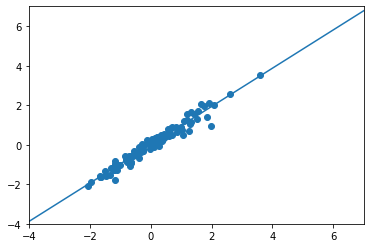

In [193]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,Y_test)
#model = LinearRegression()
from sklearn.linear_model import LinearRegression
model = LinearRegression()
Y_t = np.array(Y_test)
Y_y = np.array(y_pred)
pred = Y_y.reshape(-1,1)
Y_ = Y_t.reshape(-1,1)
model.fit(pred,Y_)
x = np.linspace(-4,7,100)
y = 0.96909563*x-0.00446976
plt.xlim(-4,7)
plt.ylim(-4,7)
plt.plot(x,y)
plt.show()

In [204]:
import numpy as np
from sklearn.metrics import *

def evaluating(y_true, y_pre, samplesets="验证集"):
    """
    :param y_true: (n_samples, )
    :param y_pre: (n_samples, )
    :samplesets: string
    :return: None
    """
    evs_ = explained_variance_score(y_true, y_pre)
    mae_ = mean_absolute_error(y_true, y_pre)
    mse_ = mean_squared_error(y_true, y_pre)
    r2_ = r2_score(y_true, y_pre)
    rmse_ = np.sqrt(mse_)
    rpd_ = np.std(y_true)/rmse_

    print("*"*100)
    print(samplesets + ' 解释方差得分  平均绝对误差  决定系数  均方误差  均方根误差  相对分析误差')
    print('结果     %6.4f       %6.4f    %6.4f   %6.4f   %6.4f        %6.4f' % (evs_, mae_, r2_, mse_, rmse_, rpd_))
    print("*"*100)
evaluating(pred,Y_)

****************************************************************************************************
验证集 解释方差得分  平均绝对误差  决定系数  均方误差  均方根误差  相对分析误差
结果     0.9547       0.1654    0.9547   0.0494   0.2224        4.6975
****************************************************************************************************


In [194]:
#将y_pred, Y_test进行最小二乘法建模
#说明预测效果
olsr = sm.OLS(y_pred, Y_test).fit()
olsr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              2223.
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                    1.77e-72
Time:                        18:44:00   Log-Likelihood:                          9.2066
No. Observations:                 106   AIC:                                     -16.41
Df Residuals:                     105   BIC:                                     -13.75
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.9854      0.021     47.147      0.000       0.944       1.027
==============================================================================
Omnibus:                       38.695   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.160
Skew:                           1.362   Prob(JB):                     2.17e-21
Kurtosis:                       6.758   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
print(X_train.shape)

(424, 3)


In [196]:
X_train.head()

,0,1,2
446,19.211936,0.032365,0.037124
473,22.069877,-0.013218,0.015619
502,25.139570,0.006904,0.010820
526,27.680004,0.044191,0.015415
412,15.612992,-0.024251,-0.027615


# BP神经网络

In [197]:
from sklearn.neural_network import MLPRegressor
# BP神经网络回归模型
model = MLPRegressor(hidden_layer_sizes=(2,), random_state=1,learning_rate_init=0.1) 
# 训练模型
model.fit(X_train,Y_train)
# 模型预测
pre = model.predict(X_test)  

C:\Users\huang\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [198]:
print(pre.shape)

(106,)


In [199]:
Y_A = np.array(Y_test)
Y_A.shape

(106, 1)

In [200]:
print(Y_A)
y = Y_A.reshape(1,106)

[[-3.97841996e-02]
 [ 1.20257251e+00]
 [ 1.23486987e+00]
 [-1.00718941e+00]
 [ 6.27616895e-01]
 [-1.33428640e+00]
 [ 7.50910363e-01]
 [ 1.64684004e+00]
 [ 7.06913071e-01]
 [ 9.00378271e-01]
 [ 1.30193732e+00]
 [ 2.99169005e-01]
 [ 6.28026454e-02]
 [-1.74244515e-01]
 [ 2.40476690e-01]
 [-7.41921126e-01]
 [ 2.00148871e-01]
 [ 5.11219212e-01]
 [ 4.21559020e-01]
 [ 1.16216120e+00]
 [ 8.78997269e-01]
 [-3.28925473e-01]
 [-5.78826497e-01]
 [ 2.55898049e+00]
 [ 3.44305247e-01]
 [ 8.13396324e-01]
 [ 8.88975926e-01]
 [-5.86597903e-01]
 [ 1.53458348e-01]
 [-8.67858585e-01]
 [-2.08319521e+00]
 [ 2.09298085e+00]
 [ 1.44978309e-01]
 [-4.72152705e-01]
 [-4.84807466e-01]
 [ 6.30014685e-01]
 [ 9.63380184e-01]
 [ 1.98572902e+00]
 [-7.53982862e-01]
 [-8.41200306e-01]
 [-4.32816116e-01]
 [ 3.75330928e-01]
 [ 3.60635905e-01]
 [-1.24166537e+00]
 [ 2.33981981e-03]
 [ 2.04662859e+00]
 [-5.47366217e-01]
 [ 1.72407306e-01]
 [-1.52733413e+00]
 [-5.15473478e-01]
 [ 8.64075313e-01]
 [ 2.72759069e-01]
 [-1.2869407

In [201]:
np.abs(Y_A-pre).mean()  

1.1671496933068528

[[0.96383982]] [-0.00597243]


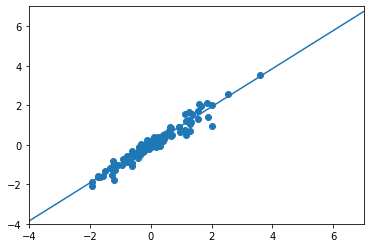

In [202]:
import matplotlib.pyplot as plt
plt.scatter(pre,Y_A)
#model = LinearRegression()
from sklearn.linear_model import LinearRegression
model = LinearRegression()
pre1 = pre.reshape(-1,1)
Y_A1 = Y_A.reshape(-1,1)
model.fit(pre1,Y_A1)
k = model.coef_
b = model.intercept_
print(k,b)
x = np.linspace(-4,7,100)
y = 0.96383982*x-0.00597243
plt.xlim(-4,7)
plt.ylim(-4,7)
plt.plot(x,y)
plt.show()

In [203]:
import numpy as np
from sklearn.metrics import *

def evaluating(y_true, y_pre, samplesets="验证集"):
    """
    :param y_true: (n_samples, )
    :param y_pre: (n_samples, )
    :samplesets: string
    :return: None
    """
    evs_ = explained_variance_score(y_true, y_pre)
    mae_ = mean_absolute_error(y_true, y_pre)
    mse_ = mean_squared_error(y_true, y_pre)
    r2_ = r2_score(y_true, y_pre)
    rmse_ = np.sqrt(mse_)
    rpd_ = np.std(y_true)/rmse_

    print("*"*100)
    print(samplesets + ' 解释方差得分  平均绝对误差  决定系数  均方误差  均方根误差  相对分析误差')
    print('结果     %6.4f       %6.4f    %6.4f   %6.4f   %6.4f        %6.4f' % (evs_, mae_, r2_, mse_, rmse_, rpd_))
    print("*"*100)
evaluating(pre1,Y_A1)

****************************************************************************************************
验证集 解释方差得分  平均绝对误差  决定系数  均方误差  均方根误差  相对分析误差
结果     0.9485       0.1743    0.9485   0.0564   0.2376        4.4060
****************************************************************************************************
